#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_28280\2499663880.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


In [3]:
# this task can be done using one single inbuilt function which is dataframe.info()
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


# Tasks

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.


In [4]:
# mean, minimum, maximum, and standard deviation can be found using function dataframe.describe() and another functions to calculate the median, mode, and range
# note: std means standard deviation
salary_stats = df.TotalPay.describe()
salary_median = df.TotalPay.median()
salary_mode = df.TotalPay.mode()
salary_range = salary_stats['max'] - salary_stats['min']
print('the salary statistics:')
print('median: \t', salary_median)
print('mode: \t', salary_mode.values) # .values we used it because the returned value is a series and the salary index is unnecesary
print('range: \t', salary_range)
print(salary_stats)


the salary statistics:
median: 	 71426.60999999999
mode: 	 [0.]
range: 	 568213.56
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64


# Tasks

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.


In [5]:
# # in the data cleaning we have three options 
# 1. drop the columns that having missing values => if this column has high percentage of missing data
# 2. drop the rows that have missing values => if the missing data is very sensetive and it may cause unrealiable result in the training, while the missing data column has low percentage of missing
#                                           => if also the row has more than one missing data
# 3. fill the missing values using mean, median, or any other value (based on the problem) => if the column has low percentage of missing [mean for the continous data, median for categorical data, another value for specefic problem]

# now we can check the missing data
print(df.isna().sum())


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [6]:
# we can check the OvertimePay and OtherPay missing rows as they have only 4 missing values
df[df.OvertimePay.isna() | df.OtherPay.isna()]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN


In [7]:
# based on our previous explanation so we have to
# drop the notes and status columns
new_df = df.drop(['Notes', 'Status'], axis=1)

# fill the Benefits column by (TotalPayBenefits - TotalPay) because the (TotalPayBenefits = TotalPay + Benefits)
new_df.Benefits = df.Benefits.fillna(df.TotalPayBenefits - df.TotalPay) 

# fill the BasePay column by (TotalPay - OtherPay - OvertimePay) because (TotalPay = BasePay + OtherPay + OvertimePay
new_df.BasePay = df.BasePay.fillna(df.TotalPay - df.OtherPay - df.OvertimePay) 

# remove the rows having NaN value for OvertimePay and OtherPay as they don't have  Employee's name and job title
new_df.dropna(inplace=True)


# now our we can check our data after the cleaning
print(new_df.isna().sum())


Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [8]:
# to check the shape of our data after cleaning
new_df.shape


(148650, 11)

# Tasks

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.


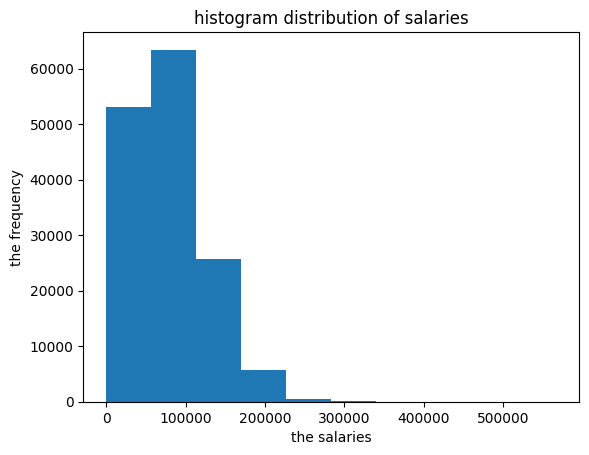

In [9]:
import matplotlib.pyplot as plt
plt.hist(new_df.TotalPay, bins=10)
plt.title('histogram distribution of salaries')
plt.xlabel('the salaries')
plt.ylabel('the frequency')
plt.show()

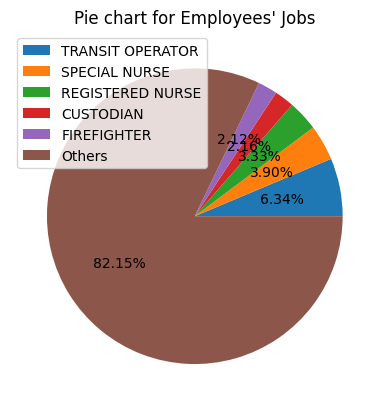

In [10]:
# to merge the same job titles with different letter case (capital or small)
new_df.JobTitle = new_df.JobTitle.apply(str.upper)

# to show the top 5 jobs (because of the space)
df2 = new_df.JobTitle.value_counts()[:5]
df2['Others'] = new_df.JobTitle.value_counts()[5:].sum()
# print(df2)

plt.pie(df2,autopct='%.2f%%')
plt.title('Pie chart for Employees\' Jobs')
plt.legend(df2.index)
plt.show()

# Tasks

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [11]:
def salary_range(salary):
    if salary < 50000:
        return 'Low'
    elif salary < 100000:
        return 'Medium'
    else:
        return 'High'

new_df['SalaryCategory'] = new_df.TotalPay.apply(salary_range)
salary_groups = new_df.groupby('SalaryCategory')
# summary stats for each group
print(salary_groups.describe())
# average salaries for each group
print(salary_groups.TotalPay.mean())


                     Id                                                 \
                  count          mean           std      min       25%   
SalaryCategory                                                           
High            41968.0  62852.266250  41279.363212      1.0  37127.75   
Low             45888.0  86923.786458  42311.390830  24701.0  61076.00   
Medium          60794.0  72736.502928  41973.326126   9525.0  45693.00   

                                              BasePay                 ...  \
                    50%        75%       max    count           mean  ...   
SalaryCategory                                                        ...   
High            74384.5  111122.25  129844.0  41968.0  117040.050351  ...   
Low             99154.5  136951.25  148654.0  45888.0   17078.848345  ...   
Medium          61665.5   99949.50  138525.0  60794.0   67827.417962  ...   

               TotalPayBenefits                Year                         \
              

# Tasks

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


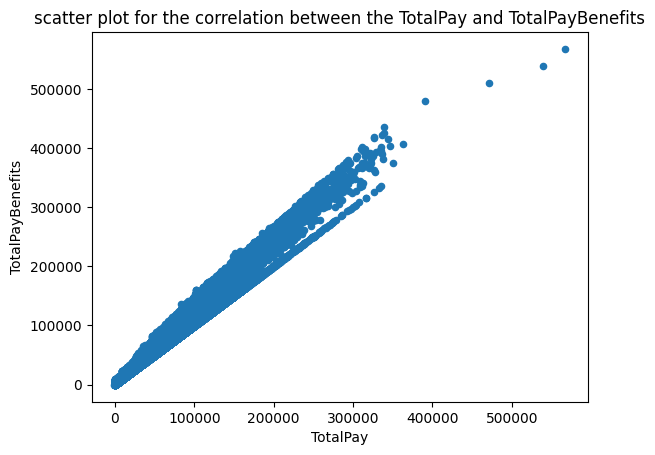

In [12]:
new_df.TotalPay.corr(new_df.TotalPayBenefits)
new_df.plot.scatter(x='TotalPay', y='TotalPayBenefits')
plt.title('scatter plot for the correlation between the TotalPay and TotalPayBenefits')
plt.show()

# Tasks

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

This dataset provids employees information as mentioned above and after analysing this dataset we found:
1. some missing data NA and we applied the proper soloution to clean them (drop or fill).
2. some noising data like negative salaries which is not logical.
3. only one agency is there which means it's not important for data analysis.
4. there are some duplicates jobs because of the letters case (capital or small) which we can deal with it by convert all the jobs to be upper case.
5. after applying upper case the jobs still having much variety of unique values so we showed only the top 5 uniques and the merged the rest into one group "other".
6. most of the employees having salaries between 50k and 100k (from the histogram).
7. based on the salary distribution we categorized the salary into three groups [low, medium, and high] and applied the groups by this categories.
8. the correlation between the TotalPay and TotalPayBenefits is positive relation "almost linear" which is normal as the TotalPayBenefits = TotalPay + Benefits


# Good Luck!